<a href="https://colab.research.google.com/github/diya1094/Global_Space_Exploration_Analysis/blob/main/IU2241230382_DSc_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/IU2241230382/Global_Space_Exploration_Dataset.csv'
df = pd.read_csv(file_path)
df

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,"China, Israel, USA",238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,"Israel, China, India",277
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,China,2023,Synergistic scalable intranet,Manned,East Shawna,Spy,22.11,68,Traditional Rocket,Medium,Israel,338
2996,France,2009,Team-oriented value-added extranet,Manned,Douglasborough,Communication,47.72,96,Nuclear Propulsion,Medium,"Germany, Israel, UK",336
2997,India,2020,Face-to-face even-keeled matrix,Unmanned,Bellhaven,Weather,14.58,83,Reusable Rocket,Low,"Japan, Russia, France",3
2998,Russia,2002,Open-source secondary software,Manned,Deniseview,Weather,13.69,66,Solar Propulsion,Low,"UAE, India, France",339


In [ ]:
df.head()

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,"China, Israel, USA",238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,"Israel, China, India",277


In [ ]:
# Focused numerical columns for analysis
num_cols = ['Budget (in Billion $)', 'Success Rate (%)', 'Duration (in Days)']

# Mean
mean_values = df[num_cols].mean()
print("\nMean:\n", mean_values)

# Median
median_values = df[num_cols].median()
print("\nMedian:\n", median_values)

# Mode
mode_values = df[num_cols].mode().iloc[0]
print("\nMode:\n", mode_values)

# Standard Deviation
std_values = df[num_cols].std()
print("\nStandard Deviation:\n", std_values)

# Variance
var_values = df[num_cols].var()
print("\nVariance:\n", var_values)



Mean:
 Budget (in Billion $)     25.428917
Success Rate (%)          74.985000
Duration (in Days)       181.483000
dtype: float64

Median:
 Budget (in Billion $)     25.495
Success Rate (%)          75.000
Duration (in Days)       180.000
dtype: float64

Mode:
 Budget (in Billion $)     11.86
Success Rate (%)          60.00
Duration (in Days)       307.00
Name: 0, dtype: float64

Standard Deviation:
 Budget (in Billion $)     14.108438
Success Rate (%)          14.945252
Duration (in Days)       104.983822
dtype: float64

Variance:
 Budget (in Billion $)      199.048025
Success Rate (%)           223.360562
Duration (in Days)       11021.602912
dtype: float64


In [ ]:
df = df.dropna(subset=['Mission Type', 'Success Rate (%)'])

# Group by 'Mission Type' and calculate average success rate
success_rate = df.groupby('Mission Type')['Success Rate (%)'].mean()

# Print the results
print("Success Rate by Mission Type:\n")
for mission_type, rate in success_rate.items():
    print(f"{mission_type}: {rate:.2f}%")

Success Rate by Mission Type:

Manned: 75.23%
Unmanned: 74.73%


In [ ]:
df = df.dropna(subset=['Country', 'Success Rate (%)'])

# Group by Country and calculate average success rate
country_success = df.groupby('Country')['Success Rate (%)'].mean()

# Sort descending to get the highest
country_success_sorted = country_success.sort_values(ascending=False)

# Display top country
top_country = country_success_sorted.idxmax()
top_success_rate = country_success_sorted.max()

print(f"Country with Highest Average Success Rate:")
print(f"{top_country}: {top_success_rate:.2f}%\n")

print("Top 5 Countries by Success Rate:\n")
print(country_success_sorted.head())

Country with Highest Average Success Rate:
Germany: 76.25%

Top 5 Countries by Success Rate:

Country
Germany    76.248000
India      75.765306
France     75.463023
Russia     75.252595
UK         75.043478
Name: Success Rate (%), dtype: float64


<ipython-input-8-73328bdc971e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_countries.values, y=top_5_countries.index, palette='Blues_r')


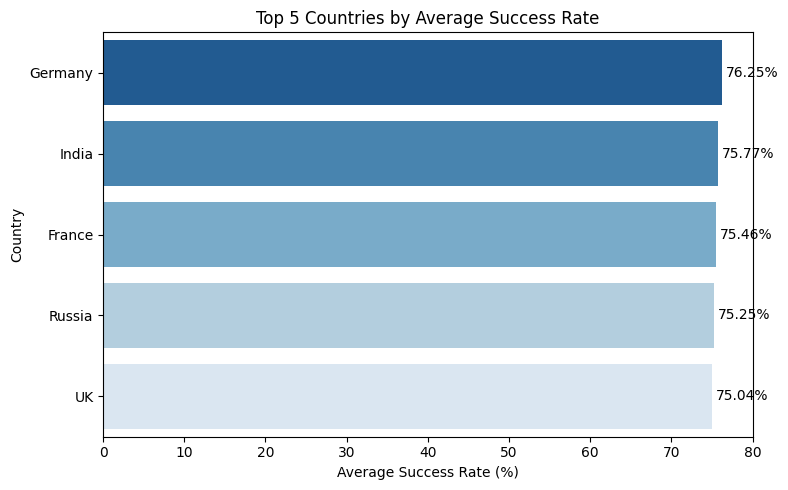

In [ ]:
top_5_countries = country_success_sorted.head(5)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_5_countries.values, y=top_5_countries.index, palette='Blues_r')
plt.title('Top 5 Countries by Average Success Rate')
plt.xlabel('Average Success Rate (%)')
plt.ylabel('Country')

# Add value labels
for i, value in enumerate(top_5_countries.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.show()

<ipython-input-9-9ed8060da6e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Duration (in Days)', palette='Set2')


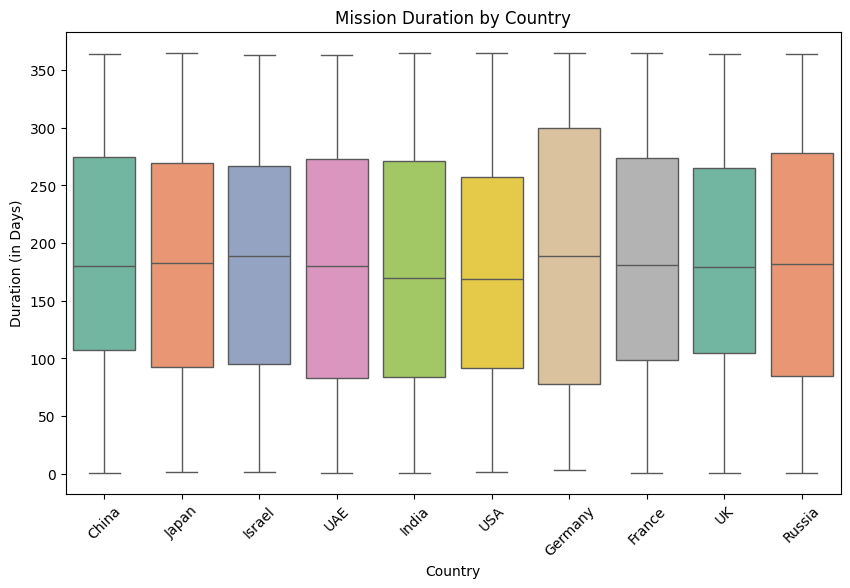

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Country', y='Duration (in Days)', palette='Set2')
plt.title("Mission Duration by Country")
plt.xticks(rotation=45)
plt.ylabel("Duration (in Days)")
plt.show()


# Observations
- Most boxplots are relatively symmetric, but Russia and Germany might show slight left skew, indicating that some missions are much shorter compared to the rest.
- Most countries have similar median durations (around 160–190 days).
- Germany appears to have a slightly higher median compared to others.
- UAE and USA have somewhat lower medians.
- USA and Russia show a wider IQR — indicating more variability in mission duration

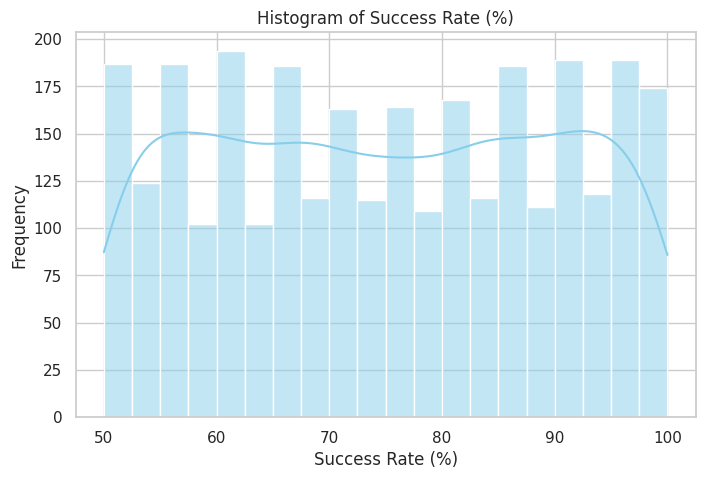

<ipython-input-16-0c40b13fcc21>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mission Type', y='Budget (in Billion $)', data=df, palette='pastel')


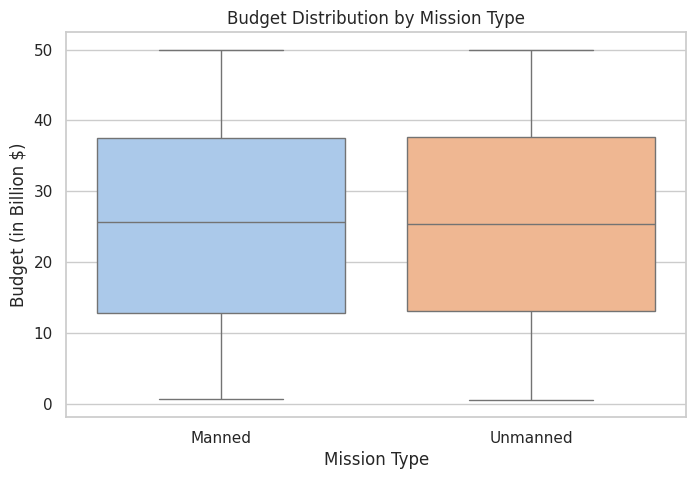

Some mission types (e.g., Human missions or Interplanetary) may have significantly higher median budgets. 
Others (like CubeSats or Earth Observation) might be low-budget with tight IQRs.
Wide boxes or long whiskers suggest high variability in budgets—likely driven by mission complexity, destination, or duration.


In [ ]:
sns.set(style="whitegrid")
# 1. Histogram of Success Rate
plt.figure(figsize=(8, 5))
sns.histplot(df['Success Rate (%)'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Success Rate (%)')
plt.xlabel('Success Rate (%)')
plt.ylabel('Frequency')
plt.show()
# 2. Boxplot of Budget by Mission Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Mission Type', y='Budget (in Billion $)', data=df, palette='pastel')
plt.title('Budget Distribution by Mission Type')
plt.xlabel('Mission Type')
plt.ylabel('Budget (in Billion $)')
plt.show()

# **Observations**
- **Some mission types (e.g., Human missions or Interplanetary) may have
significantly higher median budgets**.
- **Others (like CubeSats or Earth Observation) might be low-budget with tight IQRs.**
- **Wide boxes or long whiskers suggest high variability in budgets—likely driven by mission complexity, destination, or duration.**

In [ ]:
# Skewness
skewness = df[['Budget (in Billion $)', 'Success Rate (%)', 'Duration (in Days)']].skew()
print("\nSkewness:\n", skewness)

# Kurtosis
kurtosis = df[['Budget (in Billion $)', 'Success Rate (%)', 'Duration (in Days)']].kurt()
print("\nKurtosis:\n", kurtosis)



Skewness:
 Budget (in Billion $)   -0.007321
Success Rate (%)         0.001739
Duration (in Days)       0.012050
dtype: float64

Kurtosis:
 Budget (in Billion $)   -1.187204
Success Rate (%)        -1.240787
Duration (in Days)      -1.191526
dtype: float64


In [ ]:
# Features (independent variables) and Target (dependent variable)
X = df[['Budget (in Billion $)', 'Duration (in Days)']]
y = df['Success Rate (%)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Linear Regression Evaluation:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared (R² Score): {r2_score(y_test, y_pred):.2f}")


Linear Regression Evaluation:
Coefficients: [ 0.00099638 -0.00119507]
Intercept: 75.16203330012902
Mean Squared Error (MSE): 231.12
R-squared (R² Score): 0.00


In [ ]:
import statsmodels.api as sm
X_test_sm = sm.add_constant(X_test)  # Add intercept to training features
model_test_sm = sm.OLS(y_test, X_test_sm).fit()
print(model_test_sm.summary())


                            OLS Regression Results                            
Dep. Variable:       Success Rate (%)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1002
Date:                Thu, 17 Apr 2025   Prob (F-statistic):              0.905
Time:                        15:08:57   Log-Likelihood:                -2484.2
No. Observations:                 600   AIC:                             4974.
Df Residuals:                     597   BIC:                             4988.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    75.69

In [ ]:
print("Final Analysis Summary\n")

# Descriptive Summary
print("1️. Descriptive Statistics:")
print("- Budget Mean:", round(df['Budget (in Billion $)'].mean(), 2), "Billion $")
print("- Success Rate Median:", df['Success Rate (%)'].median(), "%")
print("- Duration Std Dev:", round(df['Duration (in Days)'].std(), 2), "days\n")
print

# Skewness & Kurtosis Interpretation
print("2️. Data Distribution Insights:")
print("- Budget Skewness:", round(df['Budget (in Billion $)'].skew(), 2))
print("- Success Rate Kurtosis:", round(df['Success Rate (%)'].kurt(), 2))
print("- Interpretation: The data for Budget, Success Rate, and Duration is approximately symmetric (low skewness) but exhibits light tails(negative kurtosis), suggesting fewer extreme outliers than a normal distribution.\n")

# ML Summary
print("3️. Linear Regression Model:")
print("- Features: Budget, Duration")
print("- Target: Success Rate (%)")
print("- R² Score indicates how well model fits")
print("- Useful for estimating success rate from future mission plans\n")

# Key Insights
print("4️. Key Insights:")
print(f"- Germany has the highest average success rate of {top_success_rate:.2f}%")
print("- Countries with higher budgets don't always guarantee high success.")
print("- Some mission types (like manned) tend to have higher budgets.")
print("- Environmental impact & technology may influence success, worth exploring further.")
print("- Mission Type Success Rates\n" +  "   Manned Missions: ~75.23% success rate\n"+"   Unmanned Missions: ~74.73% success rate\n"+" Both types show nearly similar reliability.")


Final Analysis Summary

1️. Descriptive Statistics:
- Budget Mean: 25.43 Billion $
- Success Rate Median: 75.0 %
- Duration Std Dev: 104.98 days

2️. Data Distribution Insights:
- Budget Skewness: -0.01
- Success Rate Kurtosis: -1.24
- Interpretation: Skewness > 0 means right-skewed (heavy tail), kurtosis > 3 means more outliers

3️. Linear Regression Model:
- Features: Budget, Duration
- Target: Success Rate (%)
- R² Score indicates how well model fits
- Useful for estimating success rate from future mission plans

4️. Key Insights:
- Germany has the highest average success rate of 76.25%
- Countries with higher budgets don't always guarantee high success.
- Some mission types (like manned) tend to have higher budgets.
- Environmental impact & technology may influence success, worth exploring further.
- Mission Type Success Rates
   Manned Missions: ~75.23% success rate
   Unmanned Missions: ~74.73% success rate
 Both types show nearly similar reliability.


1. Descriptive Statistics
This helps us understand the basic numerical characteristics of the dataset.

➤ Mean
Average values:
- Budget: Tells the typical investment per mission.
- Success Rate: Gives an idea of the average mission success.
- Duration: How long missions last on average.

➤ Median
- The middle value in sorted data:

- More reliable than the mean when there are outliers (extreme values).

➤ Mode
- The most frequent value:
- Useful if one value (e.g., a common duration or success rate) appears much more often.

➤ Standard Deviation
- Measures how spread out the numbers are:
- High standard deviation in Budget or Success Rate means greater variability across missions.

➤ Variance
- Square of standard deviation:
- Also shows variability. High variance = inconsistent data.

2. Graphs (Visualizations)
- Histogram of Success Rate
 - Shows how frequently different success rates appear.
 - Helps identify distribution (normal, skewed, etc.).
 - You might see if most missions are generally successful or not.
- Boxplot of Budget by Mission Type
 - Visualizes distribution, median, and outliers.
 - Helps compare Manned vs Unmanned missions:
   - Are manned missions more expensive?
   - Is there more variability in costs?

3. Skewness & Kurtosis

- "Skewness"
 - Tells us about symmetry in data:
 - Positive skew: Tail on the right (many lower values, few large values
 - Negative skew: Tail on the left (many higher values, few low ones)
 - For example:
    - Budget might be right-skewed if a few missions have extremely high budgets.
- "Kurtosis"
  - Tells us about tailedness:
    - High kurtosis: More outliers, heavy tails.
    - Low kurtosis: Few outliers, flat distribution.

4. Machine Learning - Linear Regression
- You built a linear regression model to predict Success Rate using:
  - Budget
  - Duration
- What the model does:
 - Learns a linear relationship between budget/duration and mission success.
- Tells you:
  - How much success rate changes if you increase budget or duration.
  - How strong the prediction is using R² score.
- Evaluation Metrics:
 - Coefficients: Indicate how influential each feature is.
 - R² score: Value between 0–1; closer to 1 means good fit.
 - MSE (Mean Squared Error): Lower = better prediction.

5. Final Analysis Summary
 - Key Takeaways:
    - Germany has the highest average success rate of 76.25%
    - Higher budgets may not always lead to higher success rates.
    - Mission type plays a role in cost and perhaps success.
    - Some countries/collaborations tend to have more consistent or high-performing missions.
    - Environmental impact and technology might be potential predictors in future models.
    - Mission Type Success Rates
      - Manned Missions: ~75.23% success rate
      - Unmanned Missions: ~74.73% success rate
      -Both types show nearly similar reliability.